In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# 1-16 slots
turbi_ids = list(range(1,17))

In [4]:
# load all dataframes
turbi_data_1 = {}
turbi_data_2 = {}
for turbi_id in turbi_ids:
    turbi_data_1[turbi_id] = pd.read_csv('calib-data/calib-data_vessel-slot-' + str(turbi_id) + '.csv')
    turbi_data_2[turbi_id] = pd.read_csv('calib-data/calib-data-more-ntus_vessel-slot-' + str(turbi_id) + '.csv')

In [5]:
# compute fits
logR_to_OD_fits = {}
for turbi_id in turbi_ids:
    logR_to_OD_fits[turbi_id] = np.polyfit(np.log(turbi_data_2[turbi_id]['readings']), turbi_data_2[turbi_id]['ntu']/1500, 1)
    print(logR_to_OD_fits[turbi_id])

[ 0.81419875 -3.52195812]
[ 0.85166837 -3.77458247]
[ 0.81466546 -3.51123571]
[ 0.83380912 -3.67417558]
[ 0.86999248 -3.87685914]
[ 0.83649466 -3.65141778]
[ 0.85599424 -3.77273402]
[ 0.86517144 -3.83767458]
[ 0.84527647 -3.68502226]
[ 0.86989067 -3.86477777]
[ 0.88472176 -3.97415536]
[ 0.84889754 -3.69996264]
[ 0.86654137 -3.78418144]
[ 0.85545502 -3.699803  ]
[ 0.85580836 -3.70933306]
[ 0.8411734  -3.61941095]


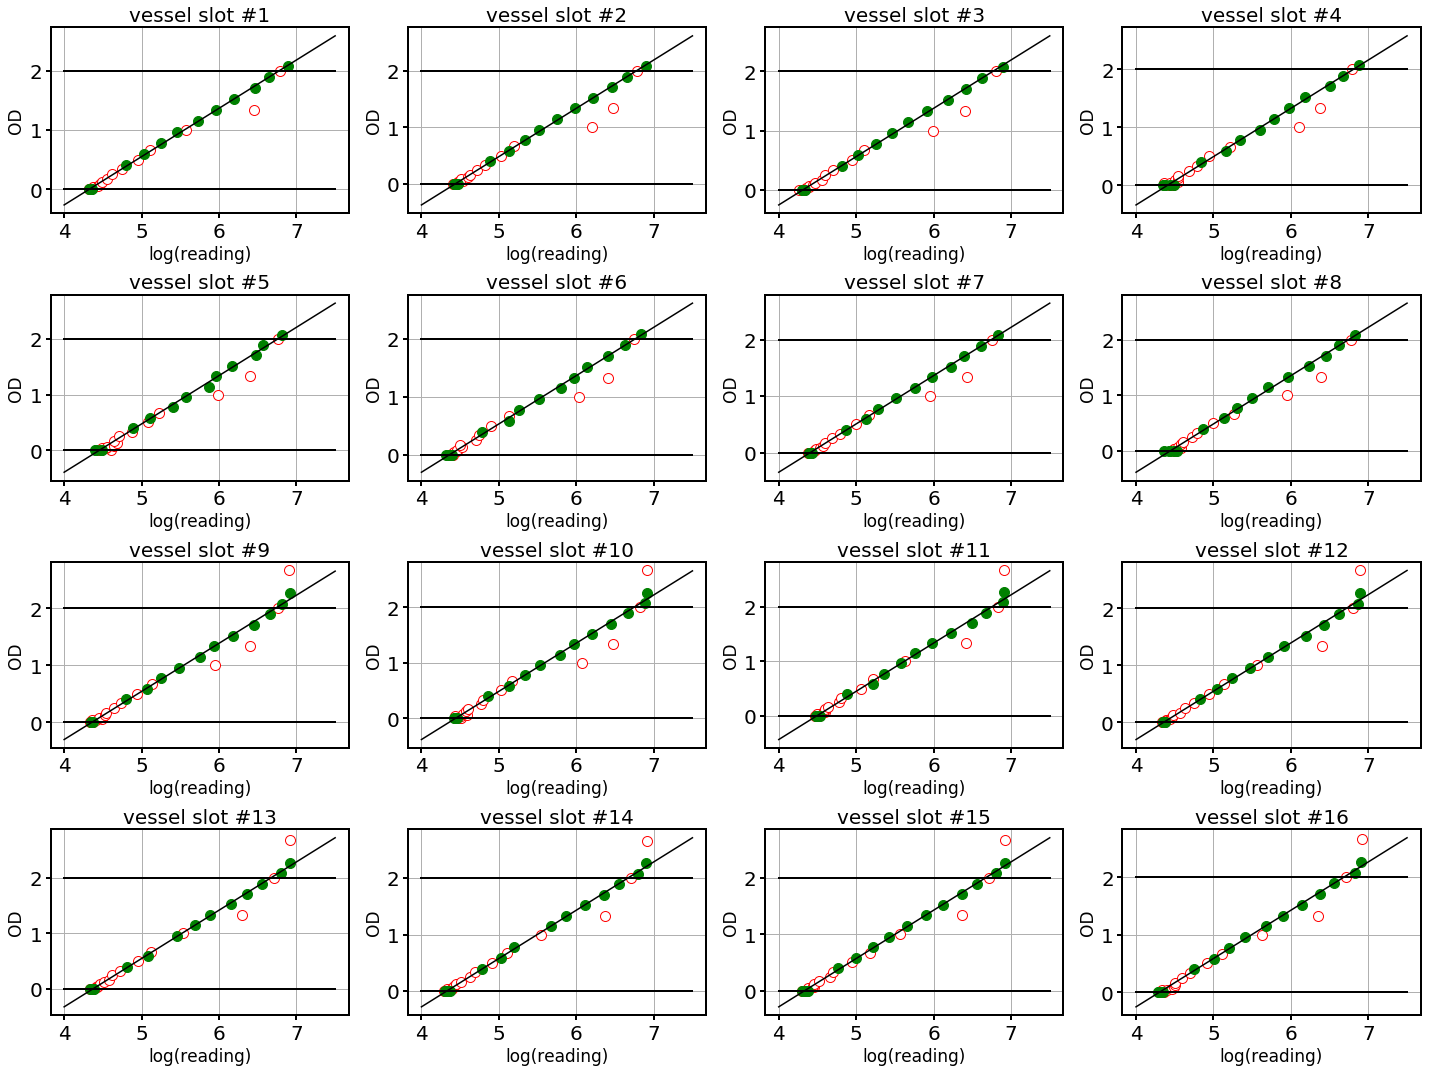

In [21]:
# plot
fig = plt.figure(figsize=(20,15))
for index,turbi_id in enumerate(turbi_ids):
    ax = plt.subplot(4,4,index+1)
    plt.plot(np.log(turbi_data_1[turbi_id]['readings']),
             turbi_data_1[turbi_id]['ntu']/1500,
             'ro',markerfacecolor='w',markersize=10,linewidth=2)
    plt.plot(np.log(turbi_data_2[turbi_id]['readings']),
             turbi_data_2[turbi_id]['ntu']/1500,
             'go',markersize=10,linewidth=2)
    plt.plot(np.array([4,7.5]), np.polyval(logR_to_OD_fits[turbi_id],np.array([4,7.5])),'k')
    plt.plot([4,7.5],[0,0],'k',linewidth=2)
    plt.plot([4,7.5],[2,2],'k',linewidth=2)
    plt.title('vessel slot #%i'%turbi_id,fontsize=20)
    plt.ylabel('OD', fontsize=17)
    plt.xlabel('log(reading)', fontsize=17)
    ax.grid(True)
    ax.tick_params(labelsize=20,grid_lw=1,size=5,width=2)
    plt.setp(ax.spines.values(), linewidth=2)
fig.tight_layout()
plt.savefig('2019-02_turbidity-calibration-curves.pdf')    

In [22]:
# write fitted calibration parameters to file
slope = [logR_to_OD_fits[turbi_id][0] for turbi_id in turbi_ids]
intercept = [logR_to_OD_fits[turbi_id][1] for turbi_id in turbi_ids]
df = pd.DataFrame.from_dict({'vessel_slot_id':turbi_ids, 'slope':slope, 'intercept':intercept})
df.to_csv('turbidity-calibration-parameters.csv',index=False)

In [33]:
# test how to read correctly
df = pd.read_csv('turbidity-calibration-parameters.csv',index_col=0)
df.loc[1]['slope']

0.8141987526158594